# Goal: Time frame with Calls Table and Events Table
<ul>  
<li><a href="#1">Finding 1</a></li> 
<li><a href="#2">Finding 2</a></li> 
<li><a href="#3">Finding 3</a></li> 
<li><a href="#merge">Merge Table with Time Frame</a></li> 
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
calls = pd.read_csv('calls.csv')
calls.head()

,date,call_disposition,contact_id
0,2019-10-25,Left Voicemail,8820954680632966332
1,2019-10-25,No Answer,8820954680632966332
2,2019-10-28,Call Back Later,9085041672616908600
3,2019-07-31,Bad Number,6174483391018071888
4,2019-09-26,No Answer,6174483391018071888


In [4]:
calls.shape

(367098, 3)

In [5]:
companies = pd.read_csv('companies.csv')
companies.head()

,company_id,industry,employee_range
0,01bcdf2ec356bf5,Software and Technology,20 - 49
1,030b0e04558fc88,Software and Technology,100 - 249
2,03561c542b2cdcb,Business Services,50 - 99
3,0366327bf47fb01,Financial Services,20 - 49
4,03ab9ddb892161d,Business Services,0 - 9


In [6]:
companies.shape

(31110, 3)

In [7]:
events = pd.read_csv('events.csv')
events.head()

,date,activity_action,activity_type,contact_id
0,2019-04-24,view,known_web_visit,4108398267771616228
1,2019-04-24,view,known_web_visit,1615093602351989804
2,2019-04-24,view,known_web_visit,8031730183355860699
3,2019-04-24,fill_out,form_fill,5975401237816306305
4,2019-04-24,fill_out,form_fill,3743028858149856355


In [8]:
events.shape

(111525, 4)

In [9]:
events.activity_action.value_counts()

view                  36547
open                  29646
fill_out              19870
click                 13464
filled_out_form       11789
attended_in_person      209
Name: activity_action, dtype: int64

In [10]:
events.activity_type.value_counts()

known_web_visit    36547
form_fill          31659
email_open         29646
email_click        13464
attended_event       209
Name: activity_type, dtype: int64

In [11]:
opportunies = pd.read_csv('opportunities.csv')
opportunies.head()

,company_id,created_date
0,73813c646290a71,2019-10-30
1,779be5c06f90563,2019-10-18
2,819d511f53f2ffd,2019-07-08
3,a2f1338863c2991,2019-08-09
4,2ddff3202da56e0,2019-09-23


In [12]:
opportunies.shape

(3213, 2)

In [13]:
# who called
people = pd.read_csv('people.csv')
people.head()

,job_level,job_function,company_id,contact_id
0,Manager,Operations,b9870ba24bb001c,1607962447045298548
1,Staff,Operations,c621a5f1e6166a7,5027514905586639586
2,Staff,Information Technology,dbd256e1136d4c9,3341080993372923602
3,Staff,Product Management,fc9d9436161e0b2,6701017887638098845
4,Manager,Finance,e7021bffb28cfb2,1711068408549891452


In [14]:
people.shape

(64429, 4)

In [15]:
people.job_level.value_counts()

Director          13217
Staff             12990
C-Level            9376
Manager            8200
Other              7880
Vice President     7805
Senior             4961
Name: job_level, dtype: int64

In [16]:
people.job_function.value_counts()

Engineering                       13646
Other                              8256
Product Management                 7545
Management                         7076
Information Technology             6153
Business Development               4629
Operations                         4106
Finance                            2523
Marketing                          2402
Sales                              1584
Customer Service & Support         1409
Consulting                          932
Human Resources                     703
Administrative                      539
Arts and Design                     539
Media & Communications              432
Healthcare Services                 431
Education                           327
Quality Assurance                   325
Accounting                          293
Legal                               253
Purchasing                          243
Real Estate                          48
Military & Protective Services       35
Name: job_function, dtype: int64

<a id='1'></a>
## Finding 1: Merge the table in a wrong way, duplicated contact_id

In [23]:
calls.merge(events, on='contact_id', how='left').head(10)

,date_x,call_disposition,contact_id,date_y,activity_action,activity_type
0,2019-10-25,Left Voicemail,8820954680632966332,NaN,NaN,NaN
1,2019-10-25,No Answer,8820954680632966332,NaN,NaN,NaN
2,2019-10-28,Call Back Later,9085041672616908600,NaN,NaN,NaN
3,2019-07-31,Bad Number,6174483391018071888,NaN,NaN,NaN
4,2019-09-26,No Answer,6174483391018071888,NaN,NaN,NaN
5,2019-09-26,No Answer,1848273219698443716,NaN,NaN,NaN
6,2019-09-26,No Answer,1848273219698443716,NaN,NaN,NaN
7,2019-12-16,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
8,2019-12-16,No Answer,2860445931853436299,2019-11-18,open,email_open
9,2019-12-16,No Answer,2860445931853436299,2019-11-15,click,email_click


In [19]:
#example to explain why
calls.query('contact_id == 2860445931853436299')

,date,call_disposition,contact_id
7,2019-12-16,No Answer,2860445931853436299
27386,2019-11-13,No Answer,2860445931853436299
27387,2019-11-13,No Answer,2860445931853436299
27388,2019-11-15,MC - MQL/QMA,2860445931853436299


In [20]:
events.query('contact_id == 2860445931853436299')

,date,activity_action,activity_type,contact_id
4554,2019-11-13,view,known_web_visit,2860445931853436299
12602,2019-11-18,open,email_open,2860445931853436299
18874,2019-11-15,click,email_click,2860445931853436299
23288,2019-12-04,click,email_click,2860445931853436299
32547,2019-11-13,open,email_open,2860445931853436299
33425,2019-11-18,click,email_click,2860445931853436299
46758,2019-11-13,fill_out,form_fill,2860445931853436299


In [24]:
calls.merge(events, on='contact_id', how='left').query('contact_id == 2860445931853436299')

,date_x,call_disposition,contact_id,date_y,activity_action,activity_type
7,2019-12-16,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
8,2019-12-16,No Answer,2860445931853436299,2019-11-18,open,email_open
9,2019-12-16,No Answer,2860445931853436299,2019-11-15,click,email_click
10,2019-12-16,No Answer,2860445931853436299,2019-12-04,click,email_click
11,2019-12-16,No Answer,2860445931853436299,2019-11-13,open,email_open
12,2019-12-16,No Answer,2860445931853436299,2019-11-18,click,email_click
13,2019-12-16,No Answer,2860445931853436299,2019-11-13,fill_out,form_fill
76392,2019-11-13,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
76393,2019-11-13,No Answer,2860445931853436299,2019-11-18,open,email_open
76394,2019-11-13,No Answer,2860445931853436299,2019-11-15,click,email_click


By the wrong merge way, there are more rows produced.

In [82]:
calls.groupby(['contact_id', 'date', 'call_disposition']).count()

Empty DataFrame
Columns: []
Index: [(166566594430710, 2019-12-16, No Answer), (166566594430710, 2019-12-30, No Answer), (266253115414781, 2019-12-18, No Answer), (638342195131369, 2019-08-29, Call Back Later), (958870857640301, 2019-07-19, No Answer), (1005177608297129, 2019-08-15, No Answer), (1087052746460939, 2019-07-10, No Answer), (1129350038519438, 2019-08-27, No Answer), (1416639479077788, 2019-09-09, No Answer), (1473704783746069, 2019-08-27, Bad Number), (1473704783746069, 2019-09-18, No Answer), (1725649318096176, 2019-12-08, No Answer), (1725649318096176, 2019-12-09, No Answer), (1725649318096176, 2019-12-11, MC - No Timeline), (1725649318096176, 2019-12-11, No Answer), (1727850244891554, 2019-08-28, No Answer), (1793866038115228, 2019-09-24, Bad Number), (1793866038115228, 2019-09-24, No Answer), (1895007566317742, 2019-08-08, No Answer), (1895007566317742, 2019-08-15, MC - No Need), (2172390189079170, 2019-11-27, No Answer), (2172390189079170, 2019-12-04, No Answer), (2172390189079170, 2019-12-12, MC - No Timeline), (2281871236130720, 2019-10-15, No Answer), (2281871236130720, 2019-10-16, Left Voicemail), (2281871236130720, 2019-10-18, Call Back Later), (2281871236130720, 2019-10-22, Left Voicemail), (2281871236130720, 2019-10-22, No Answer), (2281871236130720, 2019-10-31, No Answer), (2497165314871410, 2019-12-18, Left Voicemail), (2497165314871410, 2019-12-18, No Answer), (2497165314871410, 2019-12-19, No Answer), (2497165314871410, 2019-12-20, No Answer), (2497165314871410, 2019-12-26, No Answer), (2874069419795543, 2019-07-22, Bad Number), (3021364537129624, 2019-09-16, Bad Number), (3021364537129624, 2019-09-16, MC - No Timeline), (3021364537129624, 2019-12-26, Bad Number), (3021364537129624, 2019-12-26, No Answer), (3021364537129624, 2019-12-30, No Answer), (3546084519326007, 2019-07-02, No Answer), (3546084519326007, 2019-07-09, No Answer), (3649563019677858, 2019-11-11, Left Voicemail), (3649563019677858, 2019-11-11, No Answer), (3649563019677858, 2019-11-12, MC - MQL/QMA), (3649563019677858, 2019-11-12, No Answer), (3649563019677858, 2019-11-25, Call Back Later), (3649563019677858, 2019-11-25, No Answer), (3649563019677858, 2019-11-26, MC - Meaningful Conversation), (4051831103127556, 2019-07-17, Left Voicemail), (4051831103127556, 2019-07-17, No Answer), (4051831103127556, 2019-07-23, No Answer), (4051831103127556, 2019-08-13, No Answer), (4051831103127556, 2019-10-09, No Answer), (4051831103127556, 2019-11-15, No Answer), (4051831103127556, 2019-11-18, MC - Meaningful Conversation), (4051831103127556, 2019-11-18, No Answer), (4051831103127556, 2019-12-05, No Answer), (4051831103127556, 2019-12-30, No Answer), (4088941551929745, 2019-11-19, No Answer), (4088941551929745, 2019-11-25, No Answer), (4088941551929745, 2019-12-04, MC - Meaningful Conversation), (4088941551929745, 2019-12-04, No Answer), (4088941551929745, 2019-12-12, Left Voicemail), (4088941551929745, 2019-12-12, No Answer), (4201101494565724, 2019-08-20, No Answer), (4201101494565724, 2019-08-29, No Answer), (4201101494565724, 2019-09-10, No Answer), (4201101494565724, 2019-09-19, No Answer), (4201101494565724, 2019-10-17, No Answer), (4201101494565724, 2019-11-18, No Answer), (4201101494565724, 2019-12-03, No Answer), (4201101494565724, 2019-12-05, No Answer), (4201101494565724, 2019-12-10, No Answer), (4325845457204428, 2019-09-20, No Answer), (4379436571764161, 2019-09-11, No Answer), (4379436571764161, 2019-09-12, No Answer), (4407178273251901, 2019-10-17, No Answer), (4407178273251901, 2019-10-21, MC - Meaningful Conversation), (4407178273251901, 2019-10-29, No Answer), (4407178273251901, 2019-10-30, Call Back Later), (4407178273251901, 2019-11-08, MC - Meaningful Conversation), (4552877702739960, 2019-08-29, MC - No Need), (4604906039172236, 2019-09-23, Bad Number), (4604906039172236, 2019-09-24, No Answer), (4604906039172236, 2019-09-25, No Answer), (4604906039172236, 2019-10-01, No Answer), (4604906039172236, 2019-10-02, No Answer), 

In [83]:
calls.call_disposition.value_counts()

No Answer                         314912
Left Voicemail                     14671
Bad Number                          7114
Call Back Later                     6571
MC - No Need                        5370
MC - Meaningful Conversation        5138
MC - MQL/QMA                        2598
Left Live Message                   2415
MC - No Timeline                    1836
MC - Meeting Confirmation           1356
MC - No Authority                   1129
Wrong Point of Contact              1018
No Longer w/ Company                 995
Discovery Call Scheduled             981
MC - No Budget                       476
MC - No Technical Fit                293
Voicemail- Left Voicemail Drop       186
Call - No Answer                      38
MC - Call Back                         1
Name: call_disposition, dtype: int64

<a id='2'></a>
## Finding 2: The most activities (194 times) company did not pick up 5 phone calls. 

In [84]:
#sorted sum of the events for grouped id
event_counts_by_id = events.groupby('contact_id').count().sort_values('date', ascending=False).reset_index().drop(['date','activity_type'], axis=1)
event_counts_by_id

,contact_id,activity_action
0,7505295075260161764,194
1,6357049929604753860,180
2,2323650454700737097,147
3,5610714029673303456,143
4,5873495652945372648,143
...,...,...
22246,5093462128937294245,1
22247,5090638181239071626,1
22248,2754883680870950698,1
22249,8433994941758218844,1


In [85]:
#the call response with most events company
calls.query("contact_id == 7505295075260161764")

,date,call_disposition,contact_id
290842,2019-09-05,No Answer,7505295075260161764
290843,2019-09-05,No Answer,7505295075260161764
290844,2019-11-01,No Answer,7505295075260161764
290845,2019-12-16,No Answer,7505295075260161764


In [86]:
calls.call_disposition.value_counts()

No Answer                         314912
Left Voicemail                     14671
Bad Number                          7114
Call Back Later                     6571
MC - No Need                        5370
MC - Meaningful Conversation        5138
MC - MQL/QMA                        2598
Left Live Message                   2415
MC - No Timeline                    1836
MC - Meeting Confirmation           1356
MC - No Authority                   1129
Wrong Point of Contact              1018
No Longer w/ Company                 995
Discovery Call Scheduled             981
MC - No Budget                       476
MC - No Technical Fit                293
Voicemail- Left Voicemail Drop       186
Call - No Answer                      38
MC - Call Back                         1
Name: call_disposition, dtype: int64

In [87]:
calls.query("call_disposition == 'MC - Meaningful Conversation'")

,date,call_disposition,contact_id
69,2019-08-05,MC - Meaningful Conversation,5799307584979351473
114,2019-10-01,MC - Meaningful Conversation,5614315365558196774
116,2019-10-18,MC - Meaningful Conversation,8528859488452452671
315,2019-10-25,MC - Meaningful Conversation,2160053557783516783
376,2019-12-17,MC - Meaningful Conversation,8594472517273058790
...,...,...,...
366918,2019-10-21,MC - Meaningful Conversation,7386487978848861049
367004,2019-07-26,MC - Meaningful Conversation,8512057437039831111
367021,2019-07-17,MC - Meaningful Conversation,5928806054630571593
367024,2019-08-06,MC - Meaningful Conversation,5928806054630571593


In [88]:
calls.call_disposition.unique()

array(['Left Voicemail', 'No Answer', 'Call Back Later', 'Bad Number',
       'MC - No Need', 'MC - Meaningful Conversation',
       'MC - Meeting Confirmation', 'Discovery Call Scheduled',
       'No Longer w/ Company', 'MC - No Authority', 'MC - MQL/QMA',
       'Left Live Message', 'MC - No Budget', 'MC - No Timeline',
       'Wrong Point of Contact', 'Voicemail- Left Voicemail Drop',
       'MC - No Technical Fit', 'Call - No Answer', 'MC - Call Back'],
      dtype=object)

## Important Step: Mapping the Positive Variables

In [94]:
#positive responses
def get_pos(x):
    if x == 'MC - Meaningful Conversation':
        return 1
    elif x == 'MC - Meeting Confirmation':
        return 1
    elif x == 'MC - MQL/QMA':
        return 1
    else:
        return 0

In [95]:
#if positive responses return 1 in call_disposition column
calls_temp = calls.copy()
calls_temp.call_disposition = calls_temp.call_disposition.apply(get_pos)
calls_temp = calls_temp.drop('date', axis=1).groupby('contact_id').sum().reset_index()
calls_temp.head()

,contact_id,call_disposition
0,166566594430710,0
1,266253115414781,0
2,638342195131369,0
3,958870857640301,0
4,1005177608297129,0


In [101]:
combined = calls_temp.merge(event_counts_by_id, on='contact_id', how='left')
combined = combined.dropna()
combined

,contact_id,call_disposition,activity_action
5,1087052746460939,0,4.0
9,1725649318096176,0,2.0
13,2172390189079170,0,2.0
14,2281871236130720,0,1.0
15,2497165314871410,0,7.0
...,...,...,...
64650,9220737175662006854,0,2.0
64651,9220988583412404301,0,19.0
64654,9221365981464707787,1,2.0
64655,9221691394698869671,1,11.0


<a id='3'></a>
## Finding 3: Scatterplot Funfact

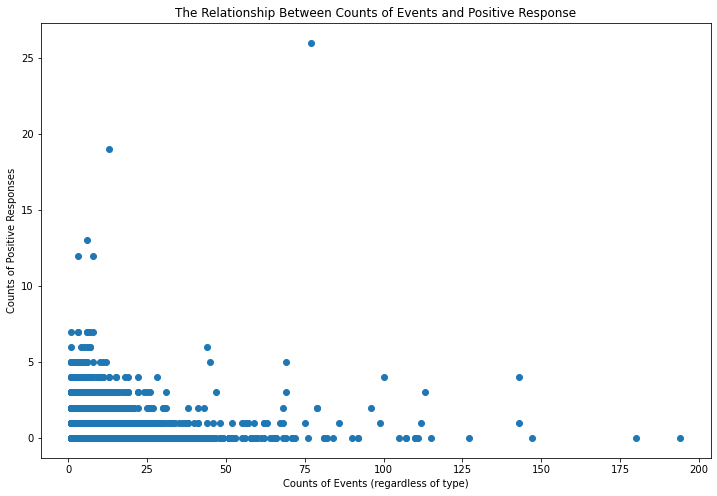

In [103]:
plt.figure(figsize=(12,8))
plt.scatter(combined.activity_action, combined.call_disposition)
plt.title('The Relationship Between Counts of Events and Positive Response')
plt.xlabel('Counts of Events (regardless of type)')
plt.ylabel('Counts of Positive Responses')
plt.show()

Based on the scatterplot:
1. Most companies have many counts of events and no positive responses.
2. Only few of the companies have high positive responses.

Suggestion:
1. Train the employees working in the Call Center with people skills so that during call they can be more friendly and engaging.
2. Maintain a tracker which reminds of follow-ups so that the representative can talk to the person again and try to convince them in purchasing 6sense product.
5. Contact persons from the previous company who responded since they are more likely to buy their product.

Similar Kaggle Sample:
https://www.kaggle.com/loveall/cleaning-visualizing-and-modeling-cold-call-data

<a id='merge'></a>
# Based on Time Frame

### Time Frame on calls table

In [196]:
type(calls.date[0])

str

In [197]:
new_calls = calls.copy()
new_calls['date'] = pd.to_datetime(new_calls['date'], format='%Y-%m-%d')
new_calls.head()

,date,call_disposition,contact_id
0,2019-10-25,Left Voicemail,8820954680632966332
1,2019-10-25,No Answer,8820954680632966332
2,2019-10-28,Call Back Later,9085041672616908600
3,2019-07-31,Bad Number,6174483391018071888
4,2019-09-26,No Answer,6174483391018071888


In [198]:
#positive responses
def get_pos(x):
    if x == 'MC - Meaningful Conversation':
        return 1
    elif x == 'MC - Meeting Confirmation':
        return 1
    elif x == 'MC - MQL/QMA':
        return 1
    else:
        return 0

In [199]:
new_calls_disposition = new_calls.copy()
new_calls_disposition.call_disposition = new_calls_disposition.call_disposition.apply(get_pos)
new_calls_disposition = new_calls_disposition.drop('date', axis=1).groupby('contact_id').sum().sort_values('call_disposition', ascending=False).reset_index()
new_calls_disposition.head()

,contact_id,call_disposition
0,866659017680622750,26
1,2974518792887422733,19
2,5689916162122230730,18
3,2563817588376783298,14
4,3831961766320141998,13


In [200]:
new_calls_time = new_calls.groupby(['contact_id']).agg(lambda x: max(x) - min(x)).sort_values('date', ascending=False).reset_index()
new_calls_time

,contact_id,date
0,1788315889737511044,183 days
1,8468023606453927141,183 days
2,2680561098649963168,183 days
3,4197057779527445661,183 days
4,2540645441967285227,183 days
...,...,...
64661,6383302405961648920,0 days
64662,3020354175357105751,0 days
64663,6383079103058674949,0 days
64664,3020555656802007664,0 days


In [201]:
#double check if it is true
new_calls.query('contact_id == 166566594430710')

,date,call_disposition,contact_id
281395,2019-12-30,No Answer,166566594430710
281396,2019-12-16,No Answer,166566594430710


In [202]:
#merge the new_calls_time and new_calls_disposition
new_calls_merge = new_calls_disposition.merge(new_calls_time, on='contact_id', how='left')
new_calls_merge

,contact_id,call_disposition,date
0,866659017680622750,26,131 days
1,2974518792887422733,19,103 days
2,5689916162122230730,18,156 days
3,2563817588376783298,14,106 days
4,3831961766320141998,13,87 days
...,...,...,...
64661,3240550105967123005,0,0 days
64662,3240563490505460011,0,0 days
64663,3240615963274991423,0,0 days
64664,3240922621600764662,0,40 days


### Time Frame on events table

In [203]:
new_events = events.copy()
new_events['date'] = pd.to_datetime(new_events['date'], format='%Y-%m-%d')
new_events.head()

,date,activity_action,activity_type,contact_id
0,2019-04-24,view,known_web_visit,4108398267771616228
1,2019-04-24,view,known_web_visit,1615093602351989804
2,2019-04-24,view,known_web_visit,8031730183355860699
3,2019-04-24,fill_out,form_fill,5975401237816306305
4,2019-04-24,fill_out,form_fill,3743028858149856355


In [204]:
new_events_time = new_events.groupby(['contact_id']).agg(lambda x: max(x) - min(x)).sort_values('date', ascending=False).reset_index()
new_events_time

,contact_id,date
0,1415788574014422038,335 days
1,8589813686327644231,335 days
2,2840799196508399016,330 days
3,6456597479048152312,330 days
4,5687714639638044912,325 days
...,...,...
22246,4836069608754815172,0 days
22247,4836211839472306087,0 days
22248,4837219643221673356,0 days
22249,1042133571770950338,0 days



## combine table with time frame

In [217]:
#merge unique contact_id with these two new table
combine_time = new_calls_merge.merge(new_events_time, on='contact_id',how='left').rename(columns={'date_x':'calls_time', 'date_y':'events_time'})
combine_time 

,contact_id,call_disposition,calls_time,events_time
0,866659017680622750,26,131 days,300 days
1,2974518792887422733,19,103 days,240 days
2,5689916162122230730,18,156 days,NaT
3,2563817588376783298,14,106 days,NaT
4,3831961766320141998,13,87 days,134 days
...,...,...,...,...
64661,3240550105967123005,0,0 days,NaT
64662,3240563490505460011,0,0 days,NaT
64663,3240615963274991423,0,0 days,NaT
64664,3240922621600764662,0,40 days,NaT


## Start to Build Model